Eduardo Gerab
Vinicius Valenca

Imports necessarios para a atividade

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_digits
import seaborn as sns

Carregamento do Dataset, separacao das bases X e y  e  plot de exemplos dos digitos

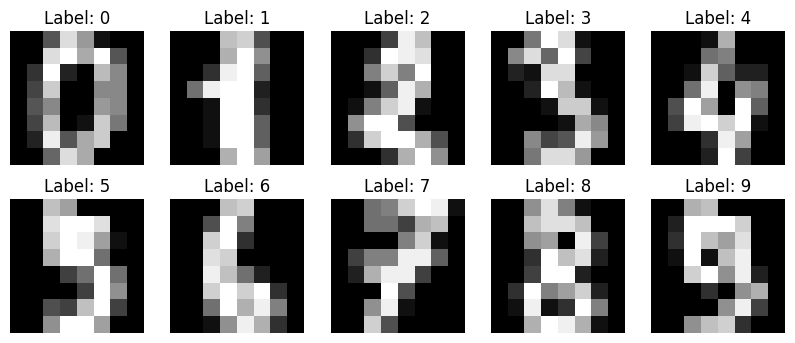

In [ ]:
digits = load_digits()
X, y = digits.data, digits.target

# Plot alguns exemplos
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()

# **Metodo Holdout**

Aqui, dividimos as bases de treino e teste, alem de criar a MLP e utilizar GridSearch para encontrar os melhores parametros possiveis e treinar a rede com eles.

In [ ]:
# Divida o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defina os parâmetros que serão testados
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300, 400],
}

# Crie a rede MLP
mlp = MLPClassifier(random_state=42)

# Use GridSearchCV para encontrar os melhores parâmetros
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtenha os melhores parâmetros encontrados
best_params = grid_search.best_params_
print("Melhores parâmetros:", best_params)

# Treine a rede MLP com os melhores parâmetros
best_mlp = MLPClassifier(random_state=42, **best_params)
best_mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Melhores parâmetros: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'max_iter': 200}


MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(100, 50),
              random_state=42)

Depois da etapa de treinamento, plotamos a curva de perda

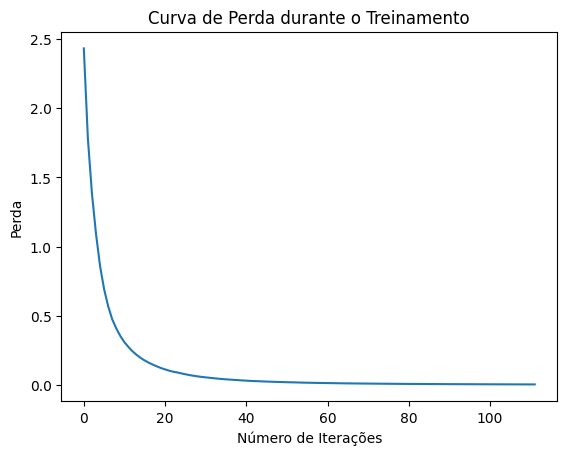

In [ ]:
plt.plot(best_mlp.loss_curve_)
plt.title('Curva de Perda durante o Treinamento')
plt.xlabel('Número de Iterações')
plt.ylabel('Perda')
plt.show()

Como pode ser visto no grafico acima, a perda cai mais a cada iteracao, o que mostra que o modelo esta aprendendo com os dados de treinamento

Depois, fizemos as predicoes do conjunto de teste e calculamos a matriz de confusao, acuracia e exibimos o relatorio com o resto das metricas importantes para a analise do modelo.

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.88      1.00      0.93        28
           2       1.00      0.97      0.98        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.96      0.87      0.91        30
           9       0.97      0.97      0.97        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



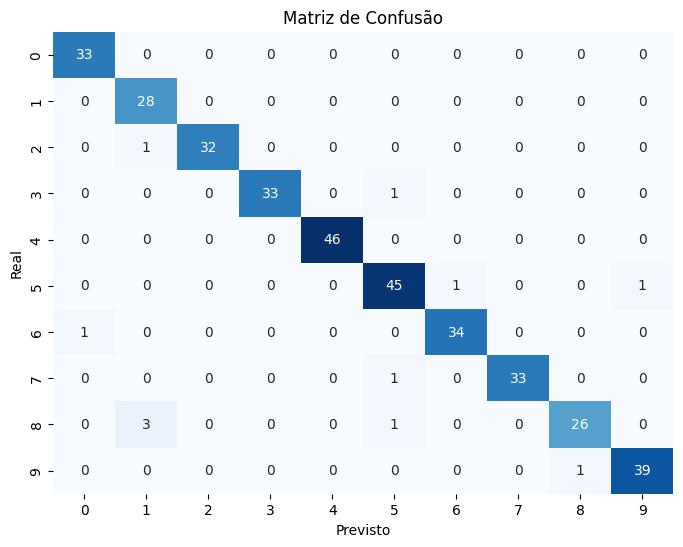

In [ ]:
y_pred = best_mlp.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

Como pode ser percebido, o modelo tem uma otima taxa de cobertura, f1-score e precisao, ou seja, o modelo esta acertando muitas predicoes constantemente